<a href="https://colab.research.google.com/github/AdrianDiazGaxiola/Proyecto-Final/blob/main/Ciclones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install willow

Se importan las librerías a utilizar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

Se lee y guarda en un dataframe los datos del archivo .csv con los datos de los ciclones que han impactado a México

In [ ]:
url = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/raw/main/Data/Ciclones.csv"

Ciclones = pd.read_csv(url, header=2, encoding='ISO-8859-1')

Se eliminan las filas y columnas que no se utilizarán

In [ ]:
df = Ciclones

Cols = df.columns.tolist()

#Se eliminan las columnas que no se utilizarán (número, nombre, y categoría en impacto, ya que no se analizará la evolución de cada ciclón)
df = df.drop(columns = {Cols[0], Cols[1]})#, Cols[5]

#Se elimina el ciclón que aparece dos veces (solo se cosidera la ubicación del primer impacto)
df = df.drop(df.index[301])

Cols = df.columns.tolist()
print(Cols)
print(df)


['\nImpacto en tierra', '\nFecha de impacto', 'Categoría\nmáxima', 'Categoría \nen impacto', 'Velocidad \nen impacto (km/h)', '\nCosta']
                                   \nImpacto en tierra  ...    \nCosta
0                         Chamela - Pto Vallarta, Jal.  ...   Pacífico
1                                      Sta. Cruz, Nay.  ...   Pacífico
2           Villa de Tututepec de Melchor Ocampo, Oax.  ...   Pacífico
3                               Lázaro Cardenas, Mich.  ...   Pacífico
4                    30 Km Al Este De Tapachula, Chis.  ...   Pacífico
..                                                 ...  ...        ...
314  Inmediaciones de Chemuyil, Q. Roo y a 15 km al...  ...  Atlántico
315                                                NaN  ...        NaN
316                                                NaN  ...        NaN
317                                                NaN  ...        NaN
318                                                NaN  ...        NaN

[318 rows 

Se renombran los nombres de las columnas del dataframe

In [ ]:
df.columns = ["Entidad_Impacto", "Fecha", "Categoría_Máxima", "Categoría en impacto", "Velocidad impacto", "Costa"]
print(df)

                                       Entidad_Impacto  ...      Costa
0                         Chamela - Pto Vallarta, Jal.  ...   Pacífico
1                                      Sta. Cruz, Nay.  ...   Pacífico
2           Villa de Tututepec de Melchor Ocampo, Oax.  ...   Pacífico
3                               Lázaro Cardenas, Mich.  ...   Pacífico
4                    30 Km Al Este De Tapachula, Chis.  ...   Pacífico
..                                                 ...  ...        ...
314  Inmediaciones de Chemuyil, Q. Roo y a 15 km al...  ...  Atlántico
315                                                NaN  ...        NaN
316                                                NaN  ...        NaN
317                                                NaN  ...        NaN
318                                                NaN  ...        NaN

[318 rows x 6 columns]


Se cambian los nombres de las ubicaciones a únicamente los nombres completos de los estados correspondiente

In [ ]:
#Se cambia el tipo de dato de la columna con las entidades a tipo string, para poder utilizar las funciones a continuación
df['Entidad_Impacto'] = df['Entidad_Impacto'].astype(str) 

estados_abv = ['Ags.', 'Bc.', 'Bcs.', 'Camp.', 'Coah.', 'Col.', 'Chis.', 'Chih.', 'C.D.Mx.', 'Dgo.', 'Gto.', 'Gro.', 'Hgo.', 'Jal.', 'Edo. Méx.', 'Mich.', 'Mor.', 'Nay.', 'N.L.', 'Oax.','Pue.', 'Qro.', 'QRoo.', 'S.L.P.', 'Sin.', 'Son.', 'Tab.', 'Tamps.', 'Tlax.', 'Ver.', 'Yuc.','Zac.']

estados_comp = ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Coahuila', 'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de Mexico', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Estado de Mexico', 'Michoacan', 'Morelos', 'Nayarit', 'Nuevo Leon', 'Oaxaca', 'Puebla', 'Queretaro', 'Quintana Roo', 'San Luis Potosi', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas']

#En este ciclo, se busca si la ubicación contiene la abreviatura de algún estado, de ser así, se reemplaza el nombre de la ubicación por el nombre completo del estado correspondiente
j = 0
for i in estados_abv:
  df.loc[df['Entidad_Impacto'].str.contains(i), 'Entidad_Impacto'] = estados_comp[j]
  j += 1

#Se intercambian una por una las ubicaciones sin nombre de estado al estado correspondiente
df.loc[df['Entidad_Impacto'].str.contains('Tapachula'), 'Entidad_Impacto'] = 'Chiapas'
df.loc[df['Entidad_Impacto'].str.contains('Ciudad Obregón'), 'Entidad_Impacto'] = 'Sonora'
df.loc[df['Entidad_Impacto'].str.contains('Tuxpan'), 'Entidad_Impacto'] = 'Veracruz'
df.loc[df['Entidad_Impacto'].str.contains('Cabo San Lucas'), 'Entidad_Impacto'] = 'Baja California Sur'
df.loc[df['Entidad_Impacto'].str.contains('Los Cabos'), 'Entidad_Impacto'] = 'Baja California Sur'
df.loc[df['Entidad_Impacto'].str.contains('La Angostura'), 'Entidad_Impacto'] = 'Chiapas'
df.loc[df['Entidad_Impacto'].str.contains('San Lázaro'), 'Entidad_Impacto'] = 'Baja California Sur'
df.loc[df['Entidad_Impacto'].str.contains('Punta Abreojos'), 'Entidad_Impacto'] = 'Baja California Sur'
df.loc[df['Entidad_Impacto'].str.contains('San Juan de los Planes'), 'Entidad_Impacto'] = 'Baja California Sur'
df.loc[df['Entidad_Impacto'].str.contains('El Embudo'), 'Entidad_Impacto'] = 'Baja California Sur'
df.loc[df['Entidad_Impacto'].str.contains('Pico del Monte'), 'Entidad_Impacto'] = 'Guerrero'
df.loc[df['Entidad_Impacto'].str.contains('Cd. Hidalgo'), 'Entidad_Impacto'] = 'Chiapas'
df.loc[df['Entidad_Impacto'].str.contains('Laguna San Ignacio'), 'Entidad_Impacto'] = 'Baja California Sur'
df.loc[df['Entidad_Impacto'].str.contains('Pesquería'), 'Entidad_Impacto'] = 'Oaxaca'
df.loc[df['Entidad_Impacto'].str.contains('Santa Fé'), 'Entidad_Impacto'] = 'Quintana Roo'
df.loc[df['Entidad_Impacto'].str.contains('Tulum'), 'Entidad_Impacto'] = 'Quintana Roo'
df.loc[df['Entidad_Impacto'].str.contains('Chiapas'), 'Entidad_Impacto'] = 'Chiapas'
df.loc[df['Entidad_Impacto'].str.contains('Bahía Kino'), 'Entidad_Impacto'] = 'Sonora'
df.loc[df['Entidad_Impacto'].str.contains('Guaymas'), 'Entidad_Impacto'] = 'Sonora'
df.loc[df['Entidad_Impacto'].str.contains('Antón Lizardo'), 'Entidad_Impacto'] = 'Veracruz'
df.loc[df['Entidad_Impacto'].str.contains('Villa Guadalupe'), 'Entidad_Impacto'] = 'Sonora'
df.loc[df['Entidad_Impacto'].str.contains('Río Lagartos'), 'Entidad_Impacto'] = 'Yucatán'
df.loc[df['Entidad_Impacto'].str.contains('Ciudad Constitución'), 'Entidad_Impacto'] = 'Baja California Sur'
df.loc[df['Entidad_Impacto'].str.contains('San José de las Palomas'), 'Entidad_Impacto'] = 'Baja California'
df.loc[df['Entidad_Impacto'].str.contains('Playa Careyes'), 'Entidad_Impacto'] = 'Jalisco'
df.loc[df['Entidad_Impacto'].str.contains('Ciudad Constitución'), 'Entidad_Impacto'] = 'Baja California Sur'
df.loc[df['Entidad_Impacto'].str.contains('San José del Cabo'), 'Entidad_Impacto'] = 'Baja California Sur'
df.loc[df['Entidad_Impacto'].str.contains('Tenacatita'), 'Entidad_Impacto'] = 'Jalisco'
df.loc[df['Entidad_Impacto'].str.contains('Escuinapa'), 'Entidad_Impacto'] = 'Sinaloa'
df.loc[df['Entidad_Impacto'].str.contains('Isla San Ignacio'), 'Entidad_Impacto'] = 'Sinaloa'
df.loc[df['Entidad_Impacto'].str.contains('Lázaro Cárdenas'), 'Entidad_Impacto'] = 'Michoacán'
df.loc[df['Entidad_Impacto'].str.contains('Boca de Catán'), 'Entidad_Impacto'] = 'Tamaulipas'
df.loc[df['Entidad_Impacto'].str.contains('Armería'), 'Entidad_Impacto'] = 'Colima'
df.loc[df['Entidad_Impacto'].str.contains('La Pesca'), 'Entidad_Impacto'] = 'Tamaulipas'
df.loc[df['Entidad_Impacto'].str.contains('Lechuguillas'), 'Entidad_Impacto'] = 'Veracruz'
df.loc[df['Entidad_Impacto'].str.contains('Santa Rosalía'), 'Entidad_Impacto'] = 'Baja California Sur'
df.loc[df['Entidad_Impacto'].str.contains('Rancho Nuevo'), 'Entidad_Impacto'] = 'Tamaulipas'
df.loc[df['Entidad_Impacto'].str.contains('Chetumal'), 'Entidad_Impacto'] = 'Quintana Roo'
df.loc[df['Entidad_Impacto'].str.contains('San Diego'), 'Entidad_Impacto'] = 'Baja California'
df.loc[df['Entidad_Impacto'].str.contains('Ayutla'), 'Entidad_Impacto'] = 'Jalisco'

#Funciones utilizadas para identificar ubicaciones con nombres a reemplazar
entidades = df.Entidad_Impacto.tolist()
ent = np.array(entidades)
print(np.unique(ent))

print(df.head(5))


['Baja California' 'Baja California Sur' 'Campeche' 'Chiapas' 'Coahuila'
 'Colima' 'Guerrero' 'Jalisco' 'Michoacan' 'Michoacán' 'Morelos' 'Nayarit'
 'Oaxaca' 'Puebla' 'Queretaro' 'Quintana Roo' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Veracruz' 'Yucatan' 'Yucatán' 'nan']
  Entidad_Impacto       Fecha  ... Velocidad impacto     Costa
0         Jalisco  1983/05/27  ...              65.0  Pacífico
1         Nayarit  1983/05/28  ...              65.0  Pacífico
2          Oaxaca  1981/06/04  ...              30.0  Pacífico
3       Michoacan  1971/05/24  ...             140.0  Pacífico
4         Chiapas  2010/05/29  ...              75.0  Pacífico

[5 rows x 6 columns]


Se eliminan las filas con datos nulos

In [ ]:
print(df.tail(5))

df = df.dropna()

print(df.tail(5))

    Entidad_Impacto       Fecha  ... Velocidad impacto      Costa
314    Quintana Roo  2020/10/26  ...             130.0  Atlántico
315             nan         NaN  ...               NaN        NaN
316             nan         NaN  ...               NaN        NaN
317             nan         NaN  ...               NaN        NaN
318             nan         NaN  ...               NaN        NaN

[5 rows x 6 columns]
    Entidad_Impacto       Fecha  ... Velocidad impacto      Costa
310         Sinaloa  1985/10/09  ...             165.0   Pacífico
311         Sinaloa  2018/10/23  ...             195.0   Pacífico
312    Quintana Roo  2005/10/21  ...             230.0  Atlántico
313          Colima  1992/10/09  ...             175.0   Pacífico
314    Quintana Roo  2020/10/26  ...             130.0  Atlántico

[5 rows x 6 columns]


In [ ]:
df1 = df

#Se convierte a tipo fecha los valores en la columna de las fechas
df1['Fecha'] = pd.to_datetime(df1['Fecha'], errors='coerce')

#Se crea una nueva columna para tener por separado día, mes y año
df1['Día'] = df1['Fecha'].dt.day
df1['Mes'] = df1['Fecha'].dt.month
df1['Anio'] = df1['Fecha'].dt.year

#Se ordena el dataframe por fechas
df1 = df1.sort_values(by='Fecha')

df1 = df1.drop(columns={'Fecha', 'Día'})

#Se cambia el formato de los datos de la columna "Anio" a entero
df1["Anio"] = df1["Anio"].astype(int)

print(df1.tail(10))

         Entidad_Impacto Categoría_Máxima  ... Mes  Anio
13               Chiapas               TT  ...   5  2020
62              Campeche               TT  ...   6  2020
146           Tamaulipas               H1  ...   7  2020
131  Baja California Sur               H4  ...   8  2020
160  Baja California Sur               TT  ...   8  2020
232              Chiapas               H1  ...   9  2020
128         Quintana Roo               H1  ...  10  2020
129              Yucatan               H1  ...  10  2020
69               Morelos               H4  ...  10  2020
314         Quintana Roo               H2  ...  10  2020

[10 rows x 7 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df4 = df1[df1["Anio"]>=1985]
df4 = df4.reset_index(drop=True)

print(df4.head(10))

   Entidad_Impacto Categoría_Máxima Categoría en impacto  ...      Costa Mes  Anio
0          Sinaloa               H2                   H2  ...   Pacífico  10  1985
1           Sonora               H1                   H1  ...   Pacífico   9  1986
2          Sinaloa               H1                   H1  ...   Pacífico  10  1986
3          Sinaloa               H1                   H1  ...   Pacífico  10  1986
4          Jalisco               H1                   H1  ...   Pacífico   7  1987
5  Baja California               DT                   DT  ...   Pacífico   9  1987
6         Veracruz               H1                   H1  ...  Atlántico   9  1988
7          Morelos               H5                   H5  ...  Atlántico   9  1988
8       Tamaulipas               H5                   H4  ...  Atlántico   9  1988
9        Queretaro               TT                   TT  ...  Atlántico  11  1988

[10 rows x 7 columns]


Se crea un nuevo dataframe con el formato de los dataframe de los demás fenómenos naturales, para posteriormente adjuntarlo

In [ ]:
df5 = df4

meses = ["x", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC"] 

#Se reemplazan los números de los meses a sus abreviaturas
for i in range(1, 13):
  df5['Mes'] = df5['Mes'].replace([i],meses[i])

meses = meses[1:]

estados_comp = ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Coahuila', 'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de Mexico', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Estado de Mexico', 'Michoacan', 'Morelos', 'Nayarit', 'Nuevo Leon', 'Oaxaca', 'Puebla', 'Queretaro', 'Quintana Roo', 'San Luis Potosi', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas']

df_final = pd.DataFrame(columns = {"Anio", "Mes", "Entidad", "DT", "TT", "H1", "H2", "H3", "H4", "H5", "Ciclones_Total"})

m = 0
for i in range(1985, 2021):
  df6 = df5[df5["Anio"]==i]

  for j in meses:
    df7 = df6[df6["Mes"]==j]

    for k in estados_comp:
      df8 = df7[df7["Entidad_Impacto"]==k]
      
      df_final.at[m, "Anio"] = i
      df_final.at[m, "Mes"] = j
      df_final.at[m, "Entidad"] = k

      #Se copian las cantidades de ciclones por categoría en el año, mes y entidad correspondientes
      df_final.at[m, "DT"] = (df8.Categoría_Máxima=='DT').sum().sum()
      df_final.at[m, "TT"] = (df8.Categoría_Máxima=='TT').sum().sum()
      df_final.at[m, "H1"] = (df8.Categoría_Máxima=='H1').sum().sum()
      df_final.at[m, "H2"] = (df8.Categoría_Máxima=='H2').sum().sum()
      df_final.at[m, "H3"] = (df8.Categoría_Máxima=='H3').sum().sum()
      df_final.at[m, "H5"] = (df8.Categoría_Máxima=='H4').sum().sum()
      df_final.at[m, "H4"] = (df8.Categoría_Máxima=='H5').sum().sum()
      #Se copia el total de ciclones
      df_final.at[m, "Ciclones_Total"] = df_final.at[m, "DT"] + df_final.at[m, "TT"] + df_final.at[m, "H1"] + df_final.at[m, "H2"] + df_final.at[m, "H3"] + df_final.at[m, "H4"] + df_final.at[m, "H5"]

      m += 1

Se reordenan las columnas del dataframe final y se imprime el total de ciclones entre los años de 1985 a 2020

In [ ]:
df_final = df_final[["Anio", "Mes", "Entidad", "DT", "TT", "H1", "H2", "H3", "H4", "H5", "Ciclones_Total"]]

print(df_final)

print ("Total de ciclones de 1985 a 2020: ", (df_final.Ciclones_Total).sum().sum())

       Anio  Mes              Entidad DT TT H1 H2 H3 H4 H5 Ciclones_Total
0      1985  ENE       Aguascalientes  0  0  0  0  0  0  0              0
1      1985  ENE      Baja California  0  0  0  0  0  0  0              0
2      1985  ENE  Baja California Sur  0  0  0  0  0  0  0              0
3      1985  ENE             Campeche  0  0  0  0  0  0  0              0
4      1985  ENE             Coahuila  0  0  0  0  0  0  0              0
...     ...  ...                  ... .. .. .. .. .. .. ..            ...
13819  2020  DIC           Tamaulipas  0  0  0  0  0  0  0              0
13820  2020  DIC             Tlaxcala  0  0  0  0  0  0  0              0
13821  2020  DIC             Veracruz  0  0  0  0  0  0  0              0
13822  2020  DIC              Yucatan  0  0  0  0  0  0  0              0
13823  2020  DIC            Zacatecas  0  0  0  0  0  0  0              0

[13824 rows x 11 columns]
Total de ciclones de 1985 a 2020:  226


Se descarga el dataframe final

In [ ]:
df_final.to_csv("Ciclones Final.csv", encoding='utf-8', index=False)
from google.colab import files
files.download("Ciclones Final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se crea un dataframe con los ciclones totales de cada año para poder crear una gráfica más adelante

In [ ]:
df3 = pd.DataFrame(columns = {"Anio", "DT", "TT", "H1", "H2", "H3", "H4", "H5", "Total"})

Anios = list(range(1970, 2021))

j = 0
for i in Anios:
  df2 = df1[df1["Anio"]==i]
  df3.at[j, "Anio"] = i
  df3.at[j, "DT"] = (df2.Categoría_Máxima=='DT').sum().sum()
  df3.at[j, "TT"] = (df2.Categoría_Máxima=='TT').sum().sum()
  df3.at[j, "H1"] = (df2.Categoría_Máxima=='H1').sum().sum()
  df3.at[j, "H2"] = (df2.Categoría_Máxima=='H2').sum().sum()
  df3.at[j, "H3"] = (df2.Categoría_Máxima=='H3').sum().sum()
  df3.at[j, "H4"] = (df2.Categoría_Máxima=='H4').sum().sum()
  df3.at[j, "H5"] = (df2.Categoría_Máxima=='H5').sum().sum()
  df3.at[j, "Total"] = df3.at[j, "DT"] + df3.at[j, "TT"] + df3.at[j, "H1"] + df3.at[j, "H2"] + df3.at[j, "H3"] + df3.at[j, "H4"] + df3.at[j, "H5"]

  j += 1

df3 = df3[["Anio", "DT", "TT", "H1", "H2", "H3", "H4", "H5", "Total"]]

print(df3.head(10))

print ("Total de ciclones DT de 1985 a 2020:", (df3.DT).sum().sum())
print ("Total de ciclones TT de 1985 a 2020:", (df3.TT).sum().sum())
print ("Total de ciclones H1 de 1985 a 2020:", (df3.H1).sum().sum())
print ("Total de ciclones H2 de 1985 a 2020:", (df3.H2).sum().sum())
print ("Total de ciclones H3 de 1985 a 2020:", (df3.H3).sum().sum())
print ("Total de ciclones H4 de 1985 a 2020:", (df3.H4).sum().sum())
print ("Total de ciclones H5 de 1985 a 2020:", (df3.H5).sum().sum())

   Anio DT TT H1 H2 H3 H4 H5 Total
0  1970  4  2  0  0  2  0  0     8
1  1971  3  5  2  0  0  0  0    10
2  1972  2  3  0  0  0  0  0     5
3  1973  3  2  4  0  0  0  0     9
4  1974  0  3  3  0  0  1  0     7
5  1975  1  1  0  0  2  0  0     4
6  1976  0  3  0  0  0  3  0     6
7  1977  1  0  2  0  0  0  1     4
8  1978  3  4  0  0  0  0  0     7
9  1979  1  1  1  0  0  0  0     3
Total de ciclones DT de 1985 a 2020: 64
Total de ciclones TT de 1985 a 2020: 112
Total de ciclones H1 de 1985 a 2020: 70
Total de ciclones H2 de 1985 a 2020: 28
Total de ciclones H3 de 1985 a 2020: 17
Total de ciclones H4 de 1985 a 2020: 15
Total de ciclones H5 de 1985 a 2020: 8


Se lee el archivo que contiene los datos de temperaturas, precipitación y sequías

In [ ]:
url = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/raw/main/Data/DataFrames%20Combinados/Temp%2BPrec%2BSeq.csv"

df_completo = pd.read_csv(url)

Se combina los datos de los ciclones (a partir del año 2003 ya que así se tiene el dataframe anterior) con el dataframe anterior

In [ ]:
df = df3[df3["Anio"]>=2003]

dt = df["DT"].tolist()
tt = df["TT"].tolist()
h1 = df["H1"].tolist()
h2 = df["H2"].tolist()
h3 = df["H3"].tolist()
h4 = df["H4"].tolist()
h5 = df["H5"].tolist()
total = df["Total"].tolist()

df_completo["DT"] = dt
df_completo["TT"] = tt
df_completo["H1"] = h1
df_completo["H2"] = h2
df_completo["H3"] = h3
df_completo["H4"] = h4
df_completo["H5"] = h5
df_completo["Total_Ciclones"] = total

df_completo.head(10)

,ANIO,MES,ENTIDAD,T_Max,T_Min,T_Med,Precipitacion,D0,D1,D2,D3,D4,Total_Sequías,DT,TT,H1,H2,H3,H4,H5,Total_Ciclones
0,2003,ANUAL,NAC,28.643543,13.266576,20.955060,796.10,6131,2625,1026,448,30,10260,1,5,1,2,0,0,0,9
1,2004,ANUAL,NAC,28.345458,13.388790,20.867124,872.20,4358,1243,48,19,5,5673,2,1,0,0,0,0,0,3
2,2005,ANUAL,NAC,28.967507,13.815767,21.391637,788.10,6096,1954,89,1,0,8140,1,4,2,0,0,3,0,10
3,2006,ANUAL,NAC,29.215505,14.607056,21.911281,808.00,6218,2941,1401,486,214,11260,2,0,0,1,1,0,0,4
4,2007,ANUAL,NAC,29.348220,14.673085,21.776355,812.20,4427,2725,910,201,4,8267,0,1,3,0,0,0,2,6
5,2008,ANUAL,NAC,28.983333,13.858333,21.366667,900.70,6217,3209,971,199,9,10605,2,6,0,2,0,0,0,10
6,2009,ANUAL,NAC,29.266667,14.291667,21.779167,723.40,6296,4697,953,132,8,12086,3,2,1,2,0,0,0,8
7,2010,ANUAL,NAC,28.483333,13.516667,21.000000,962.10,2365,888,864,312,0,4429,4,4,0,2,2,0,0,12
8,2011,ANUAL,NAC,29.658333,13.975000,21.820833,697.20,4195,3376,2805,1987,500,12863,4,3,1,1,0,0,0,9
9,2012,ANUAL,NAC,29.138333,14.504167,21.866667,742.34,2032,1434,760,462,82,4770,0,2,2,1,2,0,0,7


Se descarga el nuevo dataframe con los datos adjuntos

In [ ]:
df_completo.to_csv("Temp+Prec+Seq+Cic.csv", encoding='utf-8', index=False)
from google.colab import files
files.download("Temp+Prec+Seq+Cic.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se lee el archivo de temperaturas y precipitación

In [ ]:
url = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/raw/main/Data/DataFrames%20Combinados/Temperaturas%2BPrecipitaci%C3%B3n.csv"
df_completo2 = pd.read_csv(url)

Se crea un dataframe combinando los datos de temperaturas, precipitación y ciclones

In [ ]:
df = df_completo2[(df_completo2["ENTIDAD"]=="NAC") & (df_completo2["MES"]=="ANUAL")].copy()

df4 = df3[df3["Anio"]>=1985].copy()

dt = df4["DT"].tolist()
tt = df4["TT"].tolist()
h1 = df4["H1"].tolist()
h2 = df4["H2"].tolist()
h3 = df4["H3"].tolist()
h4 = df4["H4"].tolist()
h5 = df4["H5"].tolist()
total = df4["Total"].tolist()

df["DT"] = dt
df["TT"] = tt
df["H1"] = h1
df["H2"] = h2
df["H3"] = h3
df["H4"] = h4
df["H5"] = h5
df["Total_Ciclones"] = total


df = df.reset_index(drop=True)

print(df.head())

   ANIO    MES ENTIDAD      T_Max      T_Min  ...  H2  H3  H4  H5  Total_Ciclones
0  1985  ANUAL     NAC  27.896589  12.984091  ...   1   0   0   0               1
1  1986  ANUAL     NAC  28.157028  13.027165  ...   0   0   0   0               3
2  1987  ANUAL     NAC  28.067159  12.814918  ...   0   0   0   0               2
3  1988  ANUAL     NAC  28.255665  12.991370  ...   0   0   0   2               4
4  1989  ANUAL     NAC  28.312638  12.882815  ...   0   1   0   0               4

[5 rows x 15 columns]


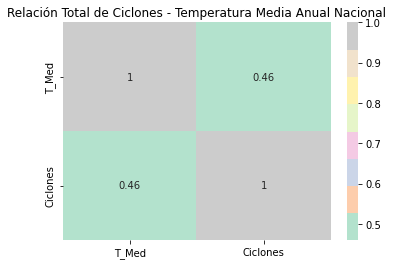

In [ ]:
df2 = pd.DataFrame()

df2['Anio'] = df.ANIO.to_list()
df2['T_Med'] = df.T_Med.to_list()
df2['Ciclones'] = df.Total_Ciclones.to_list()

df2 = df2.set_index('Anio', drop = True)

c = df2.corr()

plt.title("Relación Total de Ciclones - Temperatura Media Anual Nacional")
sns.heatmap(c, cmap = 'Pastel2', annot = True)

plt.savefig("Relación ciclones t_med gráfica.jpg", bbox_inches='tight')

Se descarga el nuevo dataframe

In [ ]:
df.to_csv("Temp+Prec+Cic.csv", encoding='utf-8', index=False)
from google.colab import files
files.download("Temp+Prec+Cic.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

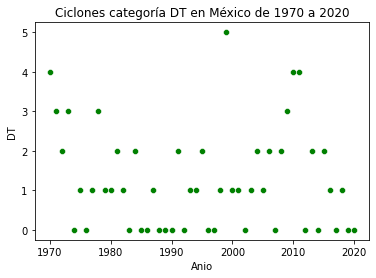

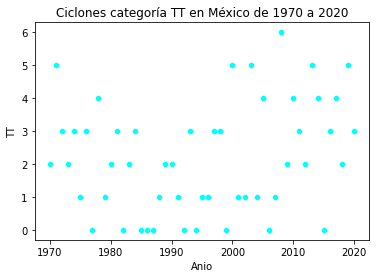

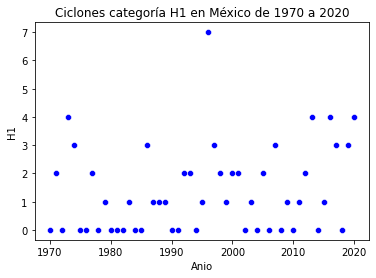

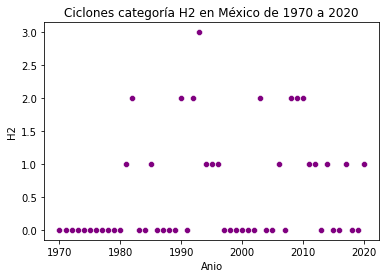

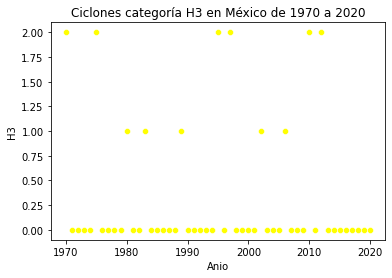

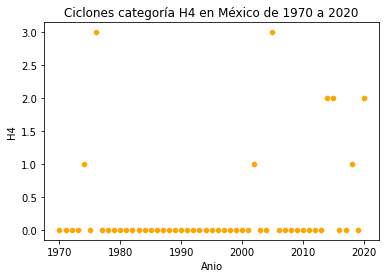

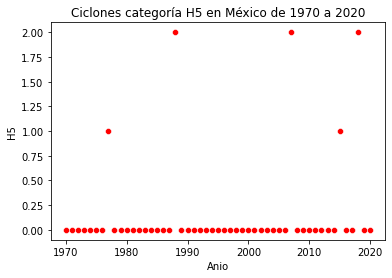

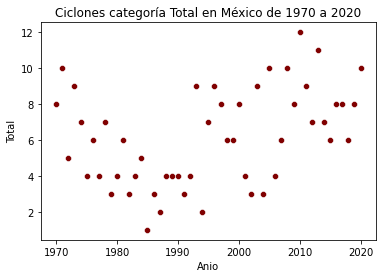

In [ ]:
#df3 = df3.set_index("Anio")

Cols = ["DT", "TT", "H1", "H2", "H3", "H4", "H5", "Total"]

regressor = LinearRegression()

colores = ["green", "cyan", "blue", "purple", "yellow", "orange", "red", "maroon"]

X = np.array(range(1970, 2021))
X = X.reshape(-1, 1)

j = 0
for i in Cols:
  y = df3[i]
  regressor.fit(X, y)
  plt.figure()
  plt.title("Ciclones categoría %s en México de 1970 a 2020" % i)
  sns.scatterplot(x = df3["Anio"], y = df3[i], color = colores[j]) 
  plt.savefig("%s gráfica.jpg" % i, bbox_inches = 'tight') 
  #sns.lmplot(x="Anio", y=i,data=df3, order=4)
  #sns.lineplot(df3["Anio"], regressor.predict(X), color = 'navy')
  j += 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

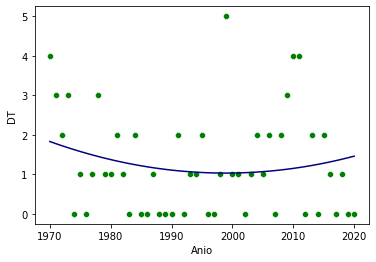

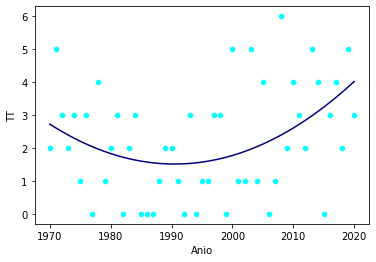

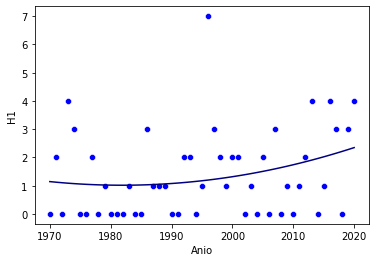

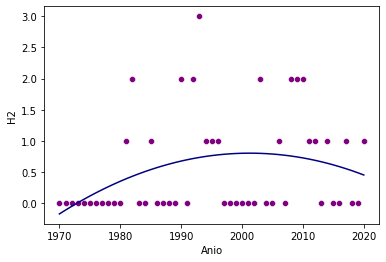

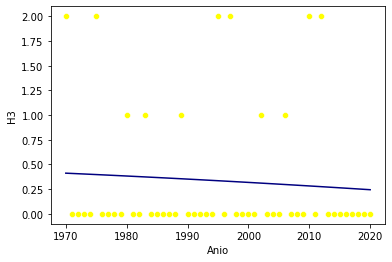

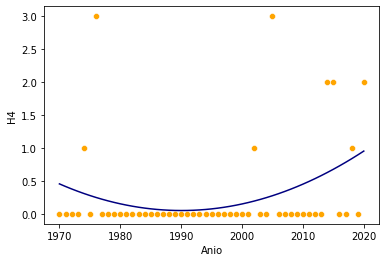

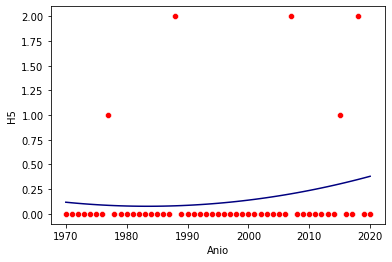

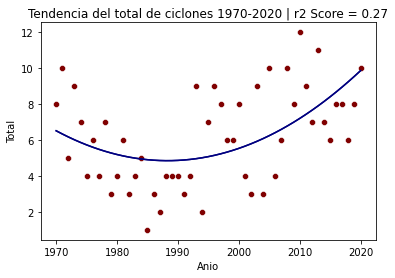

In [ ]:
Cols = ["DT", "TT", "H1", "H2", "H3", "H4", "H5", "Total"]

regressor = LinearRegression()

colores = ["green", "cyan", "blue", "purple", "yellow", "orange", "red", "maroon"]

X = np.array(range(1970, 2021))
X = X.reshape(-1, 1)

j = 0
for i in Cols:
  model = make_pipeline(PolynomialFeatures(2), LinearRegression())
  y = df3[i]
  model.fit(X, y)
  plt.figure()
  sns.scatterplot(x = df3["Anio"], y = df3[i], color = colores[j])
  if (i == 'Total'):
    coef = r2_score(y, model.predict(X))
    plt.title("Tendencia del total de ciclones 1970-2020 | r2 Score = %.2f" % coef)
    sns.lineplot(df3["Anio"], model.predict(X), color = 'navy')
    plt.savefig("Tendencia Total gráfica.jpg", bbox_inches='tight')
  #sns.lmplot(x="Anio", y=i,data=df3, order=4)
  sns.lineplot(df3["Anio"], model.predict(X), color = 'navy')
  j += 1


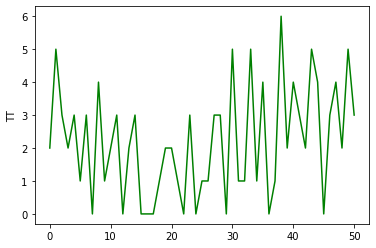

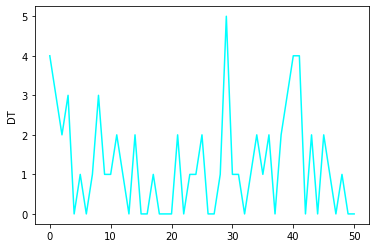

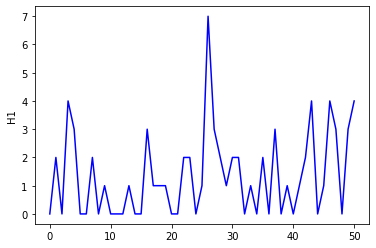

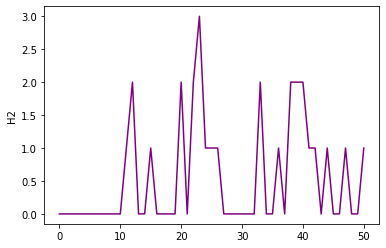

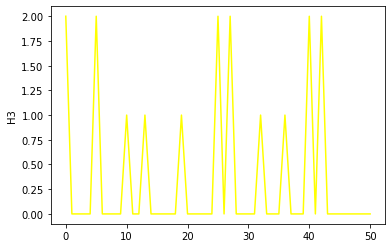

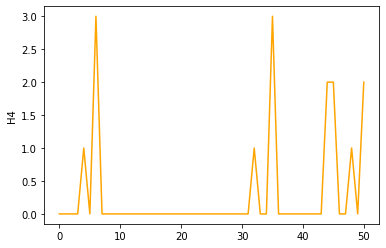

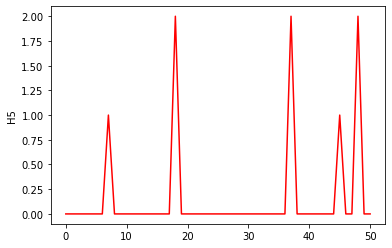

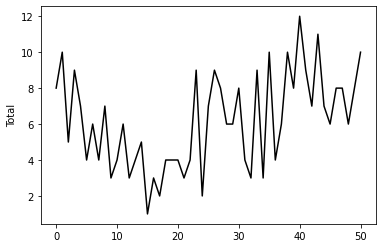

In [ ]:
plt.figure()
sns.lineplot(data=df3["TT"], color = "green")

plt.figure()
sns.lineplot(data=df3["DT"], color="cyan")

plt.figure()
sns.lineplot(data=df3["H1"], color = "blue")

plt.figure()
sns.lineplot(data=df3["H2"], color = "purple")

plt.figure()
sns.lineplot(data=df3["H3"], color = "yellow")

plt.figure()
sns.lineplot(data=df3["H4"], color = "orange")

plt.figure()
sns.lineplot(data=df3["H5"], color = "red")

plt.figure()
sns.lineplot(data=df3["Total"], color = "black")